In [1]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from scipy.integrate import odeint

In [2]:
t_step = 0.01
t_max = 500
t = np.arange(0, t_max, t_step)

<IPython.core.display.Javascript object>


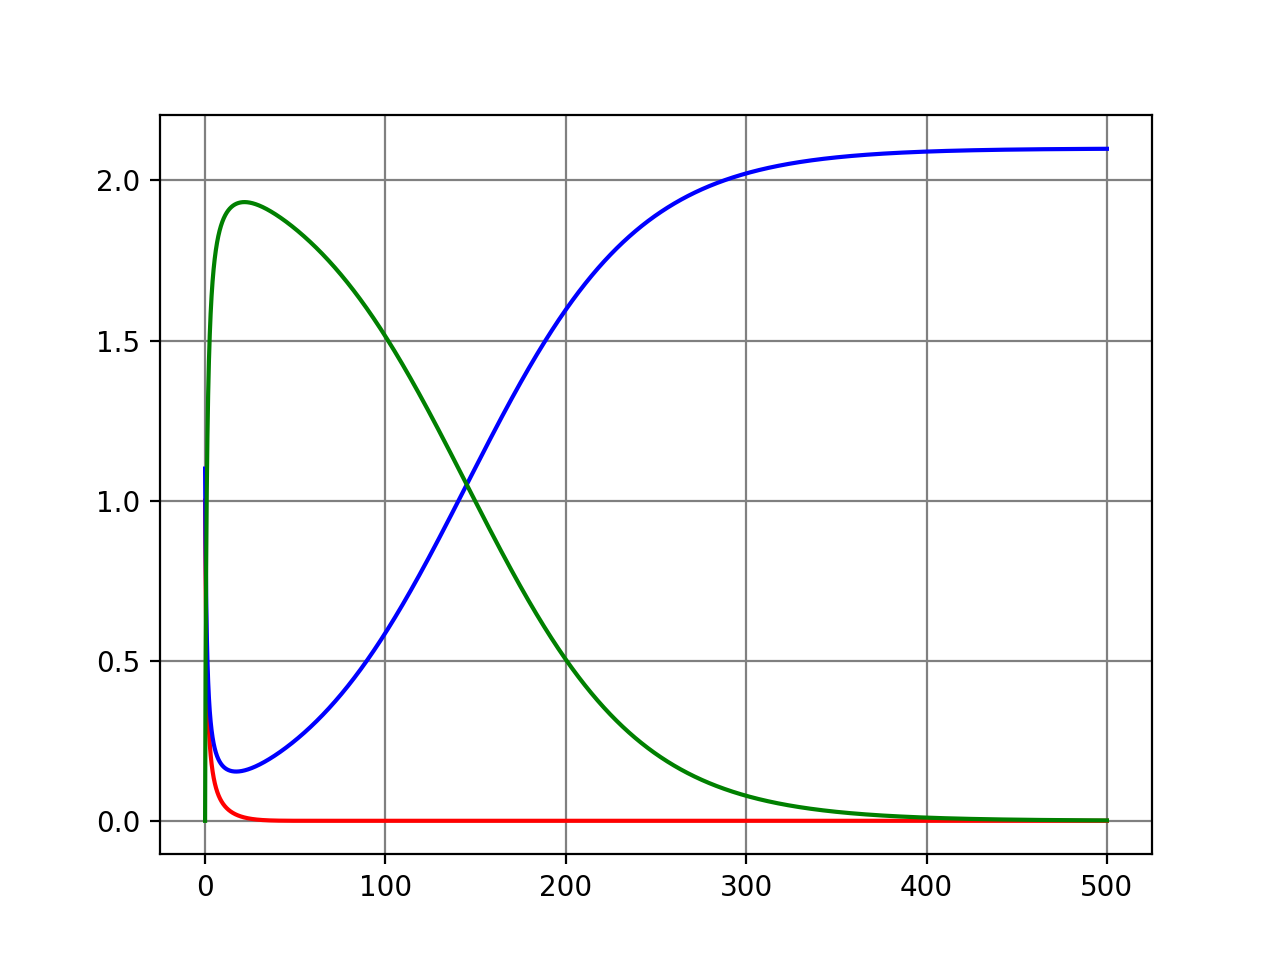

In [3]:
# Practice: steady state (winner-take-all)
# A+B -> k1 -> 2C
# A+C -> k2 -> 2A
# B+C -> k2 -> 2B

k1 = 1.0
k2 = 0.01

init_a = 1.0
init_b = 1.1
init_c = 0.0 # start with 0.0
init_state = [init_a, init_b, init_c]

def model1(state, t):
    dadt = state[0] * (k2 * state[2] - k1 * state[1])
    dbdt = state[1] * (k2 * state[2] - k1 * state[0])
    dcdt = 2 * k1 * state[0] * state[1] - k2 * state[2] * (state[0] + state[1])
    return [dadt, dbdt, dcdt]

result1 = odeint(model1, init_state, t)
plt.plot(t, result1[:,0], label='a', color='red')
plt.plot(t, result1[:,1], label='b', color='blue')
plt.plot(t, result1[:,2], label='c', color='green')
plt.grid(which='major',color='gray',linestyle='-')
plt.show()

In [4]:
t_step = 1
t_max = 200
t = np.arange(0, t_max, t_step)

In [6]:
# HW: Reaction Defusion
# A -> k1 -> 2A
# A -> k2 -> φ

x_step = 1
x_max = 15
x = np.arange(0, x_max, x_step)

k1 = 0.5
k2 = 0.2
d = 0.1

init = 10
a_init = np.zeros(x_max)
# a_init[int(x_max / 2)] = init
a_init[0] = init

def dadt(state, x):
    base = (k1/(1+state[x]) - k2) * state[x]
    if x == 0:
        return base + d * (state[x + 1] - state[x])
    if x == x_max - 1:
        return base + d * (state[x - 1] - state[x])
    return base + d * (state[x - 1] + state[x + 1] - 2 * state[x])

def model2(state, t):
    ret = np.zeros(x_max)
    for pos in x:
        ret[pos] = dadt(state, pos)
    return ret

result2 = odeint(model2, a_init, t)

<IPython.core.display.Javascript object>


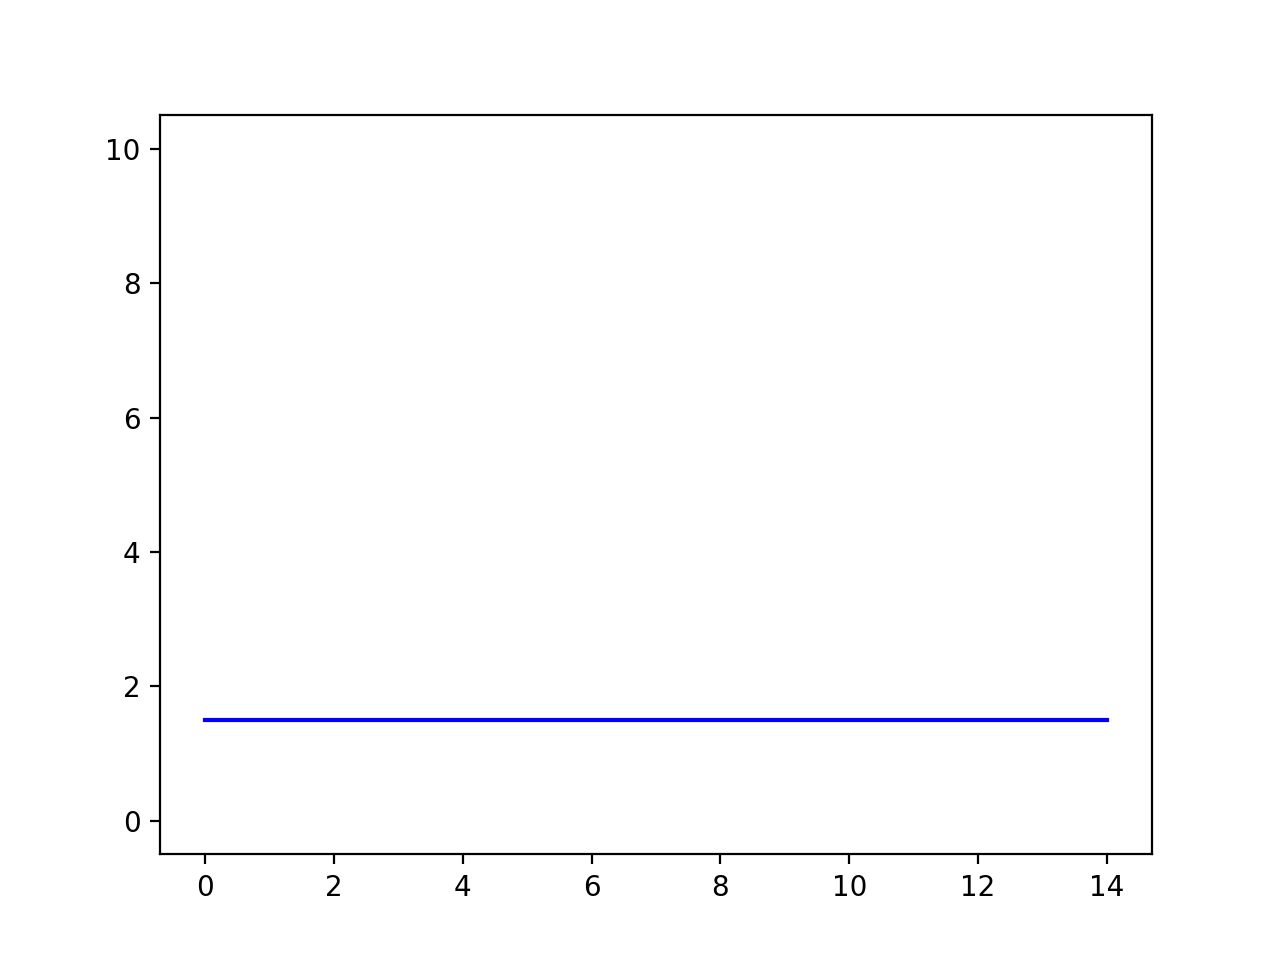

In [7]:
# Show result graph animation
fig = plt.figure()
ims = []

for i in range(len(t)):
    im = plt.plot(x, result2[i], color='blue')
    ims.append(im)
    
ani = animation.ArtistAnimation(fig, ims, interval=300)
plt.show()

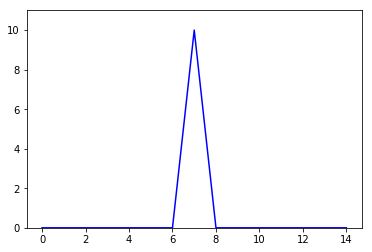

In [37]:
plt.plot(x, result2[0], color='blue')
plt.ylim(0,init + 1)
plt.show()

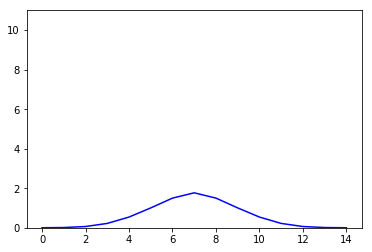

In [38]:
plt.plot(x, result2[10], color='blue')
plt.ylim(0,init + 1)
plt.show()

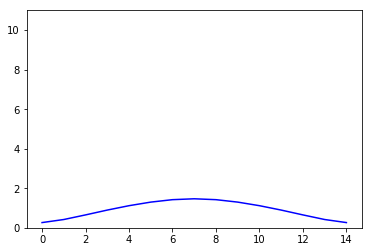

In [39]:
plt.plot(x, result2[20], color='blue')
plt.ylim(0,init + 1)
plt.show()

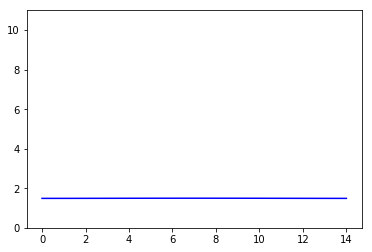

In [40]:
plt.plot(x, result2[60], color='blue')
plt.ylim(0,init + 1)
plt.show()

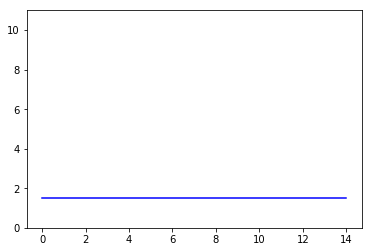

In [41]:
plt.plot(x, result2[190], color='blue')
plt.ylim(0,init + 1)
plt.show()

In [58]:

#Predator prey

scale = 0.1
x_step = 1*scale
x_max = 15
x = np.arange(0, x_max, x_step)

d = 4.0

prey_increase_rate = 0.0005 #k1
predator_death_rate = 0.0002 #k3
hunting_rate = 1.0
prey_to_predator_rate = 0.0001 #k2

init_prey = 0.1 # k3/k2 -> steady state
init_predator = 0.1 #k1/k2 -> steady state
init_grass = 1.0
init_state = [init_prey, init_predator, init_grass]

init = 10
a_init = np.zeros(2*int(x_max/scale))
# a_init[int(x_max / 2)] = init
a_init[0] = init_state[0]
a_init[1] = init_state[1]

def da2dt(state, x):
    baseprey = prey_increase_rate * state[2*x] - hunting_rate * state[2*x] * state[2*x+1]
    basepredator = hunting_rate * prey_to_predator_rate * state[2*x] * state[2*x+1] - predator_death_rate * state[2*x+1]
    if x == 0:
        return [baseprey + d * ( state[2*x + 2] -  state[2*x]), basepredator + d * ( state[2*x+1 + 2] -  state[2*x+1])]
    if x == x_max - 1:
        return [baseprey + d * (state[2*x - 2] -  state[2*x]), basepredator + d * (state[2*x+1 - 2]  -  state[2*x+1])]
    return [baseprey + d * (state[2*x - 2] + state[2*x + 2] - 2 * state[2*x]), basepredator + d * (state[2*x+1 - 2] + state[2*x+1 + 2] - 2 * state[2*x+1])]

def model3(state, t):
    ret = np.zeros(2*int(x_max/scale))
    for pos in x[::2]:
        #print(pos)
        val = da2dt(state, int(pos/2))
        ret[2*(int(pos/scale))] = val[0]
        ret[2*(int(pos/scale))+1] = val[1]
    return ret

result3 = odeint(model3, a_init, t)

<IPython.core.display.Javascript object>


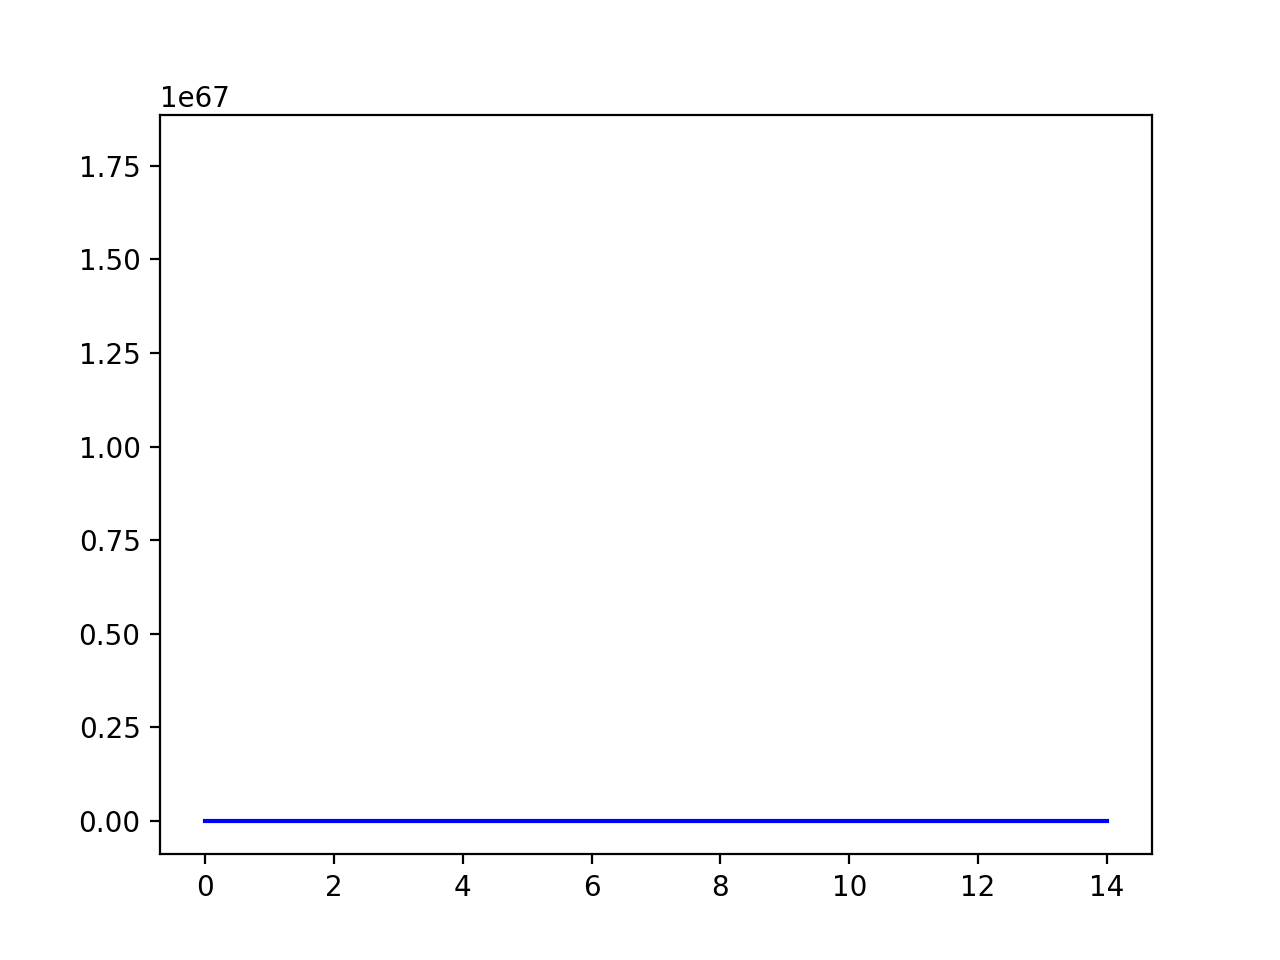

In [37]:
# Show result graph animation
fig = plt.figure()
ims = []

for i in range(len(t)):
    im = plt.plot(x, result3[i][::2], color='blue')
    #im = plt.plot(x, result3[i][1::2], color='red')
    ims.append(im)
    
ani = animation.ArtistAnimation(fig, ims, interval=300)
plt.show()

<IPython.core.display.Javascript object>


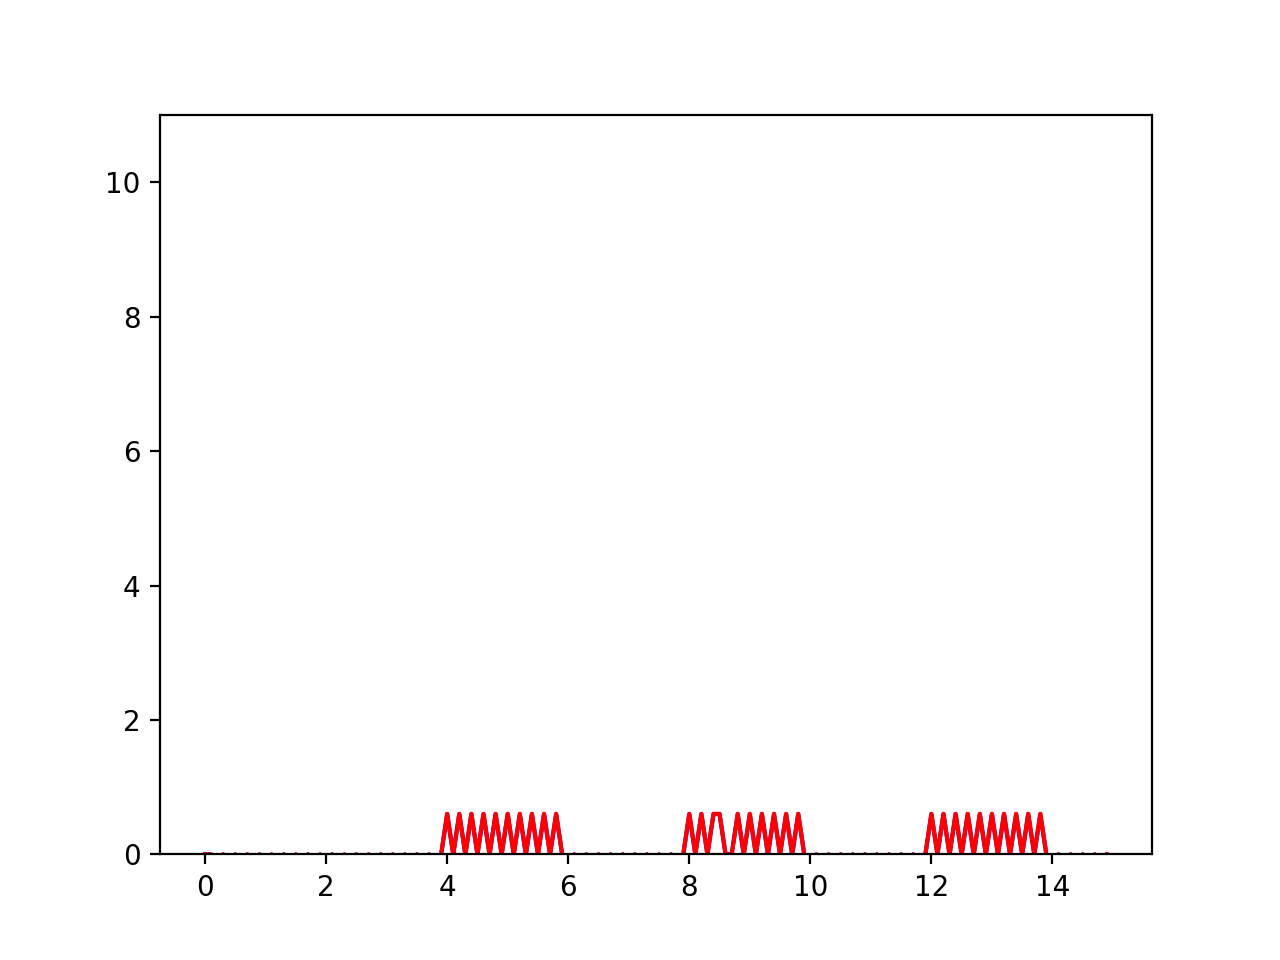

In [59]:
time = 1
plt.plot(x, result3[time][::2], color='blue')
plt.plot(x, result3[time][1::2], color='red')
plt.ylim(0,init + 1)
plt.show()